<a href="https://colab.research.google.com/github/Sireesha-cloud/Projects/blob/main/Consumer_Bhevior_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

raw_df = pd.read_csv("bank.csv")
print(raw_df.shape)


(11162, 17)


In [11]:
df = raw_df.copy()

df['deposit'] = df['deposit'].map({'yes':1, 'no':0})

# remove duplicates
df = df.drop_duplicates()


In [12]:
df['has_loan'] = ((df['loan'] == 'yes') | (df['housing'] == 'yes')).astype(int)

df['high_balance'] = (df['balance'] > df['balance'].mean()).astype(int)


In [13]:
analytics_df = df[['age','job','balance','campaign','duration','high_balance','deposit']]


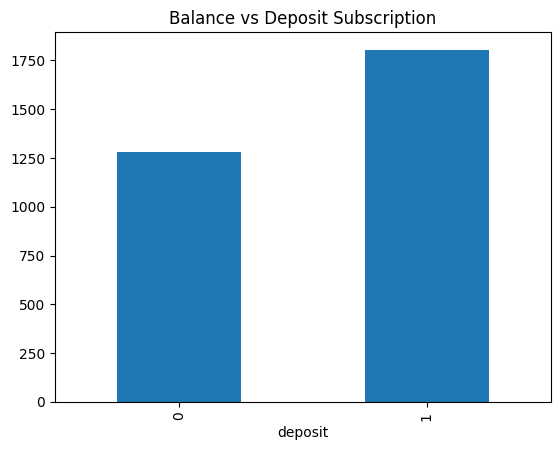

In [14]:
import matplotlib.pyplot as plt

analytics_df.groupby('deposit')['balance'].mean().plot(kind='bar')
plt.title("Balance vs Deposit Subscription")
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

le = LabelEncoder()
for col in df.select_dtypes('object'):
    df[col] = le.fit_transform(df[col])

X = df.drop('deposit',axis=1)
y = df['deposit']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

model = RandomForestClassifier()
model.fit(X_train,y_train)



RandomForestClassifier()

In [20]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)

accuracy_score(y_test,pred)


0.8423504120386958